## Introduction





##### This analysis presents an exploratory data analysis (EDA) of super store furniture data. This report analyzes sales data from Super Store Furniture, identifying key customer segments, sales trends, and  efficiencies.Identify top-selling products and Analyze sales trends and product demand. Evaluate shipping options and efficiency.

### used libarary
      Pandas
      matplotlib
      seaborn
      groupby

In [1]:
import pandas as pd
df=pd.read_csv(r'Super_Store_data.csv',encoding='iso-8859-1')

## Data cleaning

In [2]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [3]:
print(df.to_string())

      Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID           Customer Name      Segment        Country              City                 State  Postal Code   Region       Product ID   Category Sub-Category                                                                                Product Name      Sales  Quantity  Discount     Profit
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520             Claire Gute     Consumer  United States         Henderson              Kentucky        42420    South  FUR-BO-10001798  Furniture    Bookcases                                                           Bush Somerset Collection Bookcase   261.9600         2      0.00    41.9136
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520             Claire Gute     Consumer  United States         Henderson              Kentucky        42420    South  FUR-CH-10000454  Furniture       Chairs                         

In [4]:
#replace the whitespace into underscore

for i in df:
    j= i.replace(' ','_')
    df=df.rename(columns={i:j})
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [5]:
#Drop the unwanted columns

dr_columns=['Row_ID','Order_ID','Customer_ID','Product_ID',]
df=df.drop(columns=dr_columns)
print(df.columns.tolist())


['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_Date     2121 non-null   object 
 1   Ship_Date      2121 non-null   object 
 2   Ship_Mode      2121 non-null   object 
 3   Customer_Name  2121 non-null   object 
 4   Segment        2121 non-null   object 
 5   Country        2121 non-null   object 
 6   City           2121 non-null   object 
 7   State          2121 non-null   object 
 8   Postal_Code    2121 non-null   int64  
 9   Region         2121 non-null   object 
 10  Category       2121 non-null   object 
 11  Sub-Category   2121 non-null   object 
 12  Product_Name   2121 non-null   object 
 13  Sales          2121 non-null   float64
 14  Quantity       2121 non-null   int64  
 15  Discount       2121 non-null   float64
 16  Profit         2121 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 28

In [7]:
df.isnull().sum()

Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Category         0
Sub-Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.to_csv('cleaned_data')

In [9]:
#Extract the year

df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Year']=df['Order_Date'].dt.year
print(df['Year'])


0       2016
1       2016
2       2015
3       2014
4       2014
        ... 
2116    2015
2117    2016
2118    2015
2119    2014
2120    2017
Name: Year, Length: 2121, dtype: int32


### 1.What is the overall profit trend by year


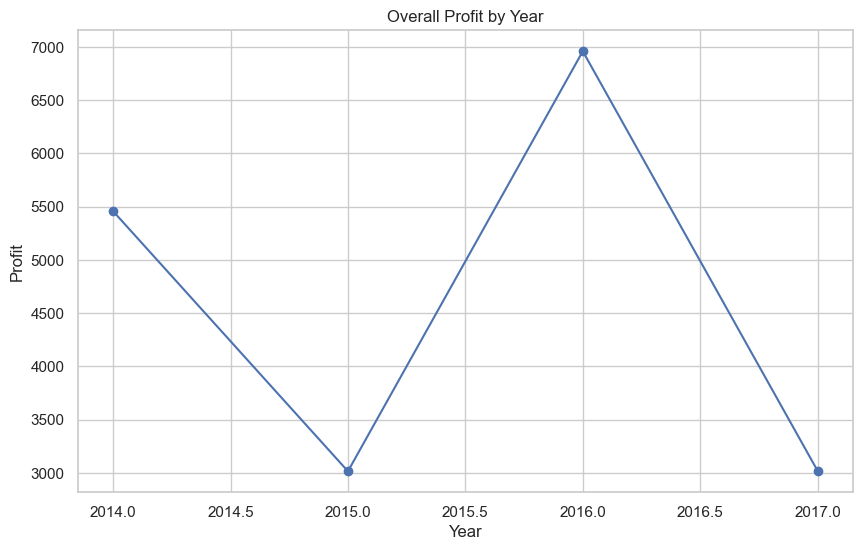

In [16]:

grouped_data = df.groupby(['Year'])['Profit'].sum().reset_index()
profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(profit_by_year['Year'], profit_by_year['Profit'], marker='o')
plt.title('Overall Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True)
plt.show()



#### It can be seen than

The Profit has fluctuated significantly over the year.

### 2.Total profit

In [36]:
#2.total profit

total_profit=df['Sales'].mean()
print(total_profit)


349.8348869872702


### 3.Which is the top 5 furniture purchased state

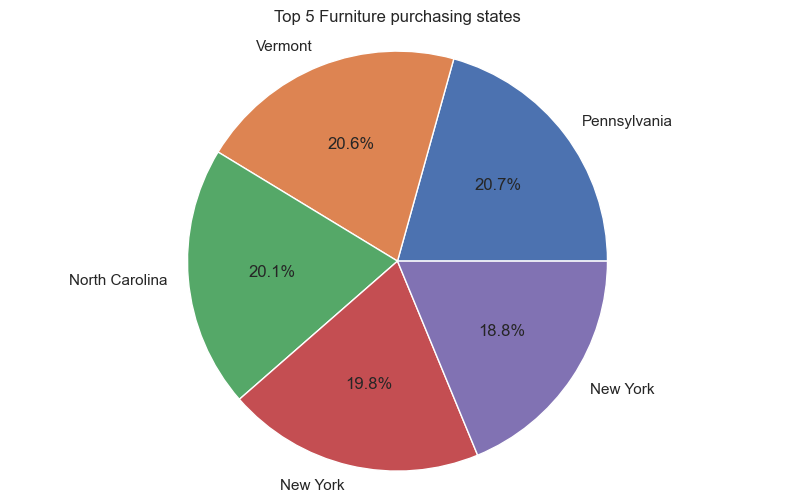

In [15]:

import matplotlib.pyplot as plt
top_5=df.nlargest(5,'Sales')
plt.figure(figsize=(10,6))
plt.pie(top_5['Sales'],labels=top_5['State'],autopct='%1.1f%%')       
plt.title('Top 5 Furniture purchasing states')
plt.axis('equal')
plt.show()

##### Based analysis reveals that pennsylvania and vermont dominate furniture purchases indicating strong demand.Pennsylvania lead with 20.7% and Vermont  follow closely with 20.6% that means  expand showrooms in pennsylvania  and vermont.

### 4.yearly sales per sub category

<function matplotlib.pyplot.show(close=None, block=None)>

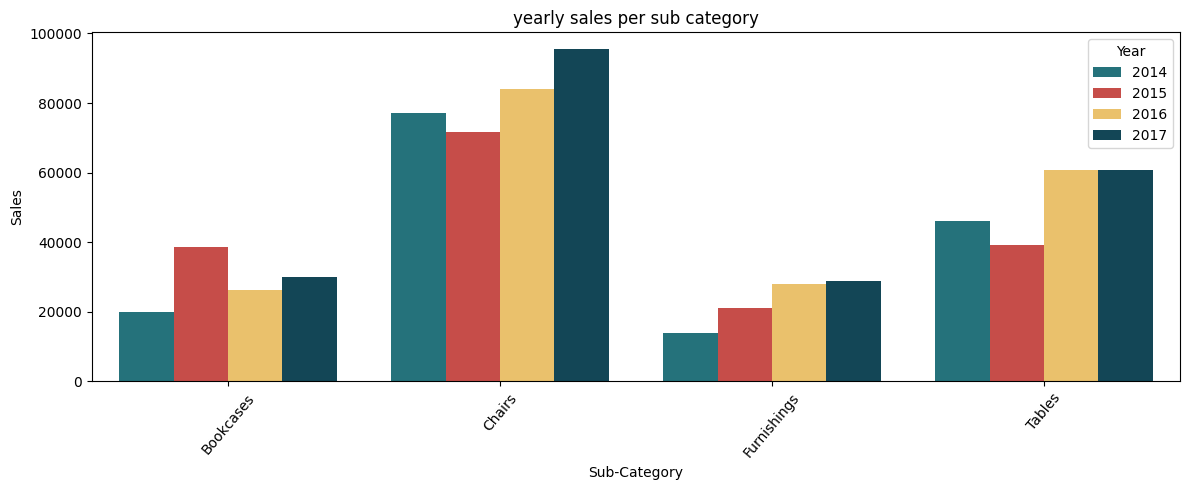

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
yearly_sales=pd.DataFrame(df.groupby(['Sub-Category','Year'])['Sales'].sum()).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=yearly_sales,x='Sub-Category',y='Sales',hue='Year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50)
plt.title('yearly sales per sub category')
plt.tight_layout()
plt.show

##### shown that how the sales of different products had been changed in the past 4 years. For some sub categories,sales had been fastest growing in 2017.In  2014  a slow growth in sales. In bookcases high sales occurs in 2015 and low sales occurs in 2014,Chairs high sales occur in 2017 and low sales occurs in 2015,Furnishings high sales occur in 2017 and low sales occurs 2014,Tables high sales occurs both 2016 and 17,low sales occurs 2015.

###  5.find the minimum and maximum number sales occur

In [39]:

max_sales=df['Sales'].max()
min_sales=df['Sales'].min()
print(f"maximum sales:({max_sales})")
print(f"minimum sales:({min_sales})")

maximum sales:(4416.174)
minimum sales:(1.892)


### 6.Which is the top 3 highest selling sub category

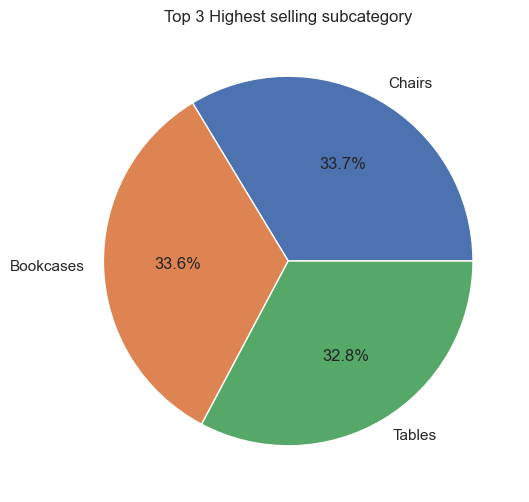

In [41]:

df=df.sort_values(by='Sales',ascending=False)
top_3=df.nlargest(3,'Sales')
plt.figure(figsize=(8,6))
plt.pie(top_3['Sales'],labels=top_3['Sub-Category'],autopct='%1.1f%%')
plt.title('Top 3 Highest selling subcategory')
plt.show()

##### It can be seen that,The highest selling sub-category is chairs that 33.7%, bookcase follow closely with 33.6% . that means this sub-category have shown high demand.increases production capacity of chairs and bookcases

### 7.find the average revenue generated by the sub category

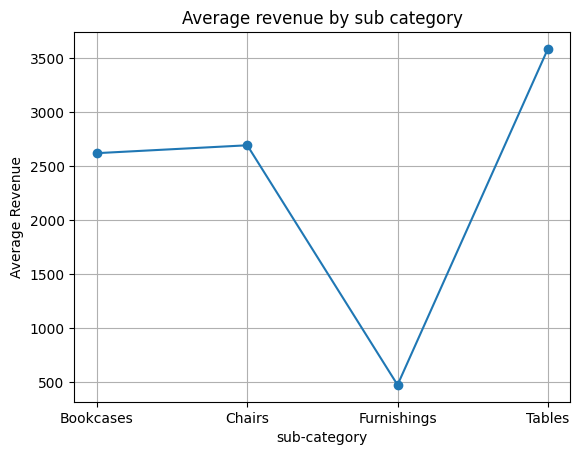

In [46]:

df['Revenue']=df['Quantity']*df['Sales']
avg_revenue=df.groupby('Sub-Category')['Revenue'].mean().reset_index()
plt.Figure(figsize=(10,6))
plt.plot(avg_revenue['Sub-Category'],avg_revenue['Revenue'],marker='o')
plt.title('Average revenue by sub category')
plt.xlabel('sub-category')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

##### Based on analysis the highest average revenue sub-category is tables.Chairs and bookcases  contribute equally to the average revenue.Furnishings generate a slightly  lower revenue

### 8.Which is the highly order placed mode of  shipment

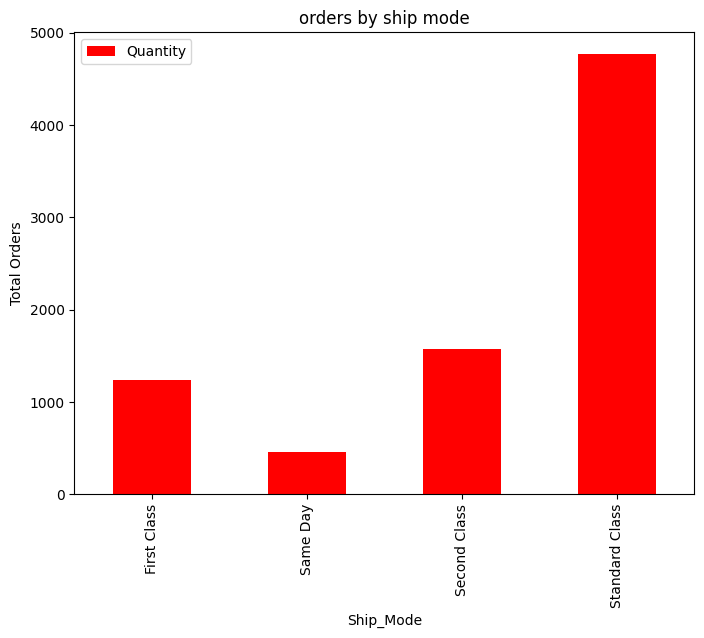

In [29]:

pivot_table=pd.pivot_table(df,index='Ship_Mode',values='Quantity',aggfunc='sum')
pivot_table.plot(kind='bar',figsize=(8,6),color='red')
plt.title('orders by ship mode')
plt.xlabel('Ship_Mode')
plt.ylabel('Total Orders')
plt.show()

Based on analysis the most popular ship modes is standard class is the preferred ship mode indicating customer prioritize cost effectiveness.second class is close second suggesting customers seek balance between speed and cost.first class is less popular indicating customer are less willing to pay premimum for faster shipping

### 9.which is the item that the customer  repeatedly  purchased

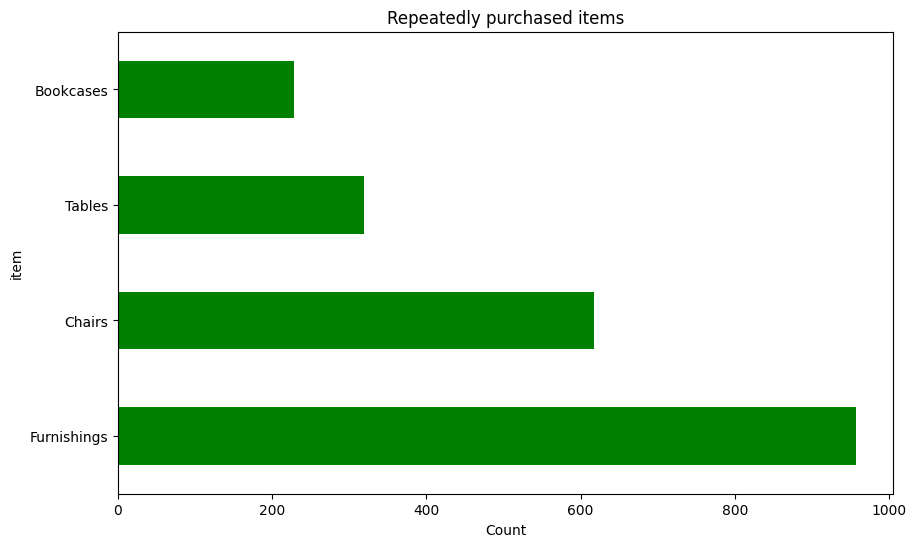

In [30]:

repeat_purchases=df['Sub-Category'].value_counts()
plt.figure(figsize=(10,6))
repeat_purchases.plot(kind='barh',color='Green')
plt.title('Repeatedly purchased items')
plt.xlabel('Count')
plt.ylabel('item')
plt.show()

##### Based  on analysis that Furnishing item is the most popular items  among repeat customers.chairs follow closely. Bookcases have the lowest repeat purchase rate that means high price or limited customer needs.

### 10.Relationship between sales & profit

correlation coefficient:0.17


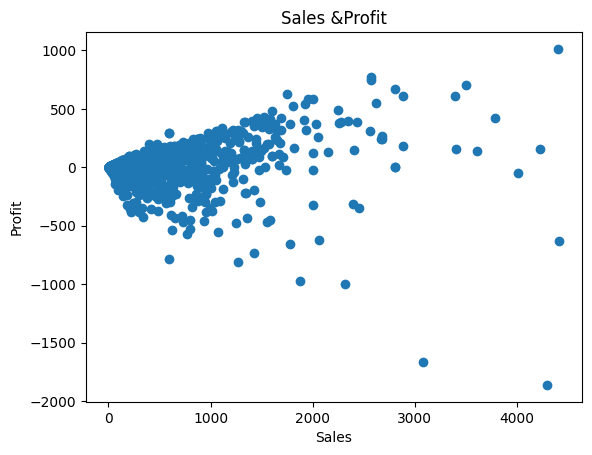

In [31]:

correlation=df['Sales'].corr(df['Profit'])
print(f"correlation coefficient:{correlation:.2f}")
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales &Profit')
plt.show()

##### Based on analysis ,no significant  relationship between sales and profit.Our analysis has revealed that there is no statistically significant relationship between sales and profit. This unexpected finding suggests that other factors beyond sales revenue are influencing profitability.

### 11.Total sales of sub-category by region

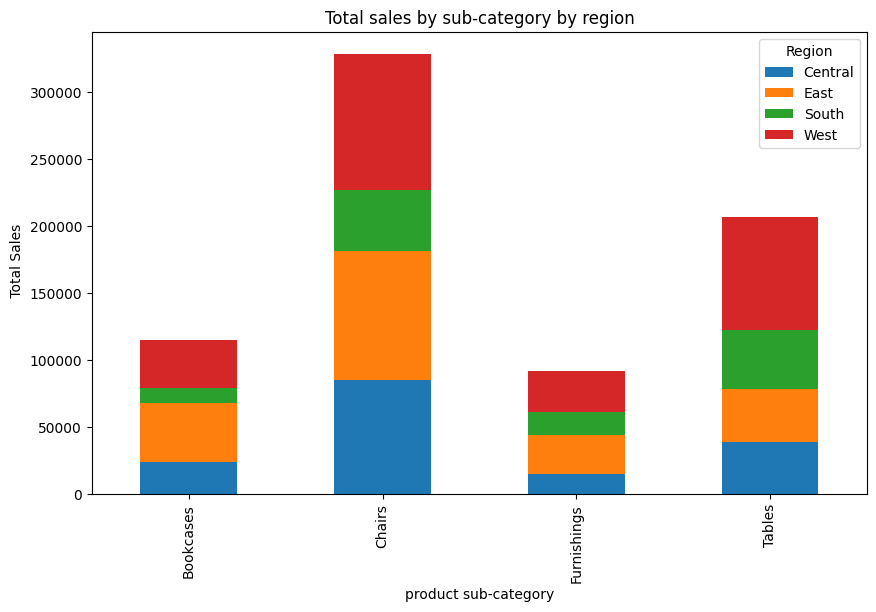

In [32]:

df_pivot=df.pivot_table(values='Sales',index='Sub-Category',columns='Region',aggfunc='sum')
df_pivot.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Total sales by sub-category by region')
plt.xlabel('product sub-category')
plt.ylabel(' Total Sales')
plt.legend(title='Region')
plt.show()

##### graphy shows sales of different product in each region. Bookcases highly sales occurs in East and lower sales in south,Chairs highly sales occurs in both East and West and lower sales in South,Furnishings highly sales occur in both East and west and lower  sales in  both South and central.Tables highly sales occur in West and lower sales in East

### 12.Which customer segment is most profitable

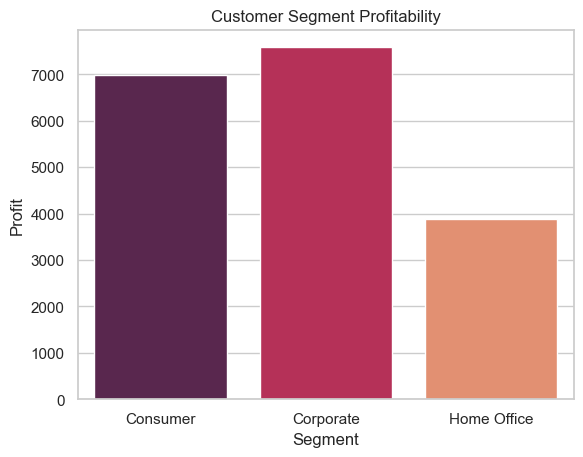

In [17]:
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
sns.set_theme(style="whitegrid")
sns.barplot(data=segment_analysis,x=segment_analysis.index,y='Profit',hue=segment_analysis.index,palette="rocket",legend=False)
plt.title("Customer Segment Profitability")
plt.show()

##### Corporate segment is most profitable, followed by Consumer Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers

### 13.Which region is most profitable

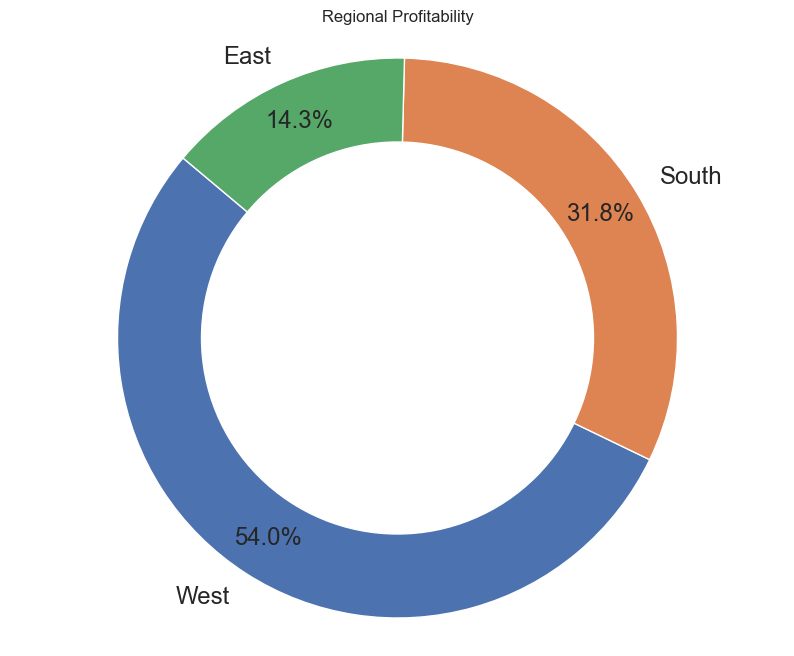

In [23]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis = region_analysis.sort_values(by='Profit', ascending=False)
region_analysis = region_analysis[region_analysis['Profit'] > 0]
plt.figure(figsize=(10, 8))
plt.pie(region_analysis['Profit'], labels=region_analysis['Region'], autopct='%1.1f%%',pctdistance=0.85, startangle=140, textprops={'size': 'x-large'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.title("Regional Profitability")
plt.show()

##### Based on the analysis the west region is the most profitable.Invest in West region to maximize the profit

# CONCLUSION

##### The comprehensive analysis of Super Store Furniture's sales data has provided valuable insights into customer behavior, sales trends, and operational efficiency. Key findings include:
##### The analysis of the super store furniture dataset has provided valuable insights into profit optimization and discount strategies. The findings indicate that focusing on product categories with high profit margins, adjusting prices, reducing costs, and optimizing sales can significantly enhance profitability. Additionally, targeted discounts, seasonal promotions, bundle deals, and limited-time offers can drive sales and increase customer loyalty. By implementing these recommendations and continuously monitoring key performance indicators, the super store can maximize profits, improve customer satisfaction, and maintain a competitive edge in the mark

##### 1.Pennsylvania and Vermont dominate furniture purchases, indicating a need for expanded showrooms.
##### 2.Chairs, bookcases, and tables are the best-selling sub-categories.
##### 3.Tables generate the highest average revenue.
##### 4.Standard Class shipping is preferred for cost-effectiveness.
##### 5.Furnishing items and chairs are favored by repeat customers.
##### 6.Sales and profit have a low correlation.
##### 7.West region are most profitable.

##### The absence of a significant relationship between sales and profit highlights the complexity of driving profitability. By understanding the underlying factors and implementing targeted strategies, the company can improve operational efficiency, optimize pricing, and enhance financial planning to achieve sustainable growth and profitability.


REFERENCE

Data source:
https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales/code